In [279]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.shape

(8594, 13)

In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
df.dtypes

cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

In [6]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


## Quick Clean

In [7]:
df = df.dropna()

In [8]:
df.shape

(8147, 13)

## Functions

In [275]:
def plotAndCompare(dataSet,x,y,xVals,compareClass):
    # collect plot and compare info
    xValLabels = []
    xValYCols = []
    xValYColsMeans = []
    for xVal in xVals:
        xValLabels.append(xVal['label'])
        xValYCol = dataSet[dataSet[x['column']] == xVal['value']][y['column']]
        xValYCols.append(xValYCol)
        xValYColsMeans.append(xValYCol.mean())

    # provide descriptive plots
    size = (4,2)
    plt.figure()
    plt.subplots(figsize = size)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
    plt.subplot(1,2,1)
    sns.distplot(dataSet[y['column']]).set_title(x['label'])
    plt.subplot(1,2,2)
    g = sns.boxplot(x=x['column'], y=y['column'], data=dataSet).set_title(x['label']+' vs '+ y['label'])
    labels=[xVals[0]['label'],xVals[1]['label']]
    g.axes.set_xticklabels(labels)
    plt.show()

    # print means
    for m,l in zip(xValYColsMeans, xValLabels):
        print ('Mean for {}: {}'.format(l,m))
    
    # perform compare 
    compareResult = compareClass(*xValYCols)
    print('\n' + str(compareResult))

In [200]:
def compute(variable):
    for c in df.cntry.unique():
        size = (4,2)
        plt.figure()
        plt.subplots(figsize = size)
        plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
        plt.subplot(1,2,1)
        sns.distplot(df.loc[df['cntry'] == c][variable]).set_title(variable + ' for country ' + c)
        plt.subplot(1,2,2)
        g = sns.boxplot(x='year', y=variable, data=df.loc[df['cntry'] == c]).set_title(variable + ' per year')
        g.axes.set_xticklabels([2012, 2014])
        plt.show()
        var12 = df[(df['cntry'] == c) & (df['year'] == 6)][variable]
        print(c + ' 2012 Median: ' + str(var12.median()))
        var14 = df[(df['cntry'] == c) & (df['year'] == 7)][variable]
        print(c + ' 2014 Median: ' + str(var14.median()))
        args = [var12, var14]
        #print (stats.mannwhitneyu(var12, var14))
        print (stats.mannwhitneyu(*args))



Country: CH


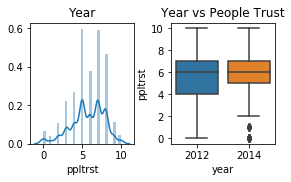

Mean for 2012: 5.685792349726776
Mean for 2014: 5.764468371467026

MannwhitneyuResult(statistic=267361.0, pvalue=0.28548480842716395)


Country: CZ


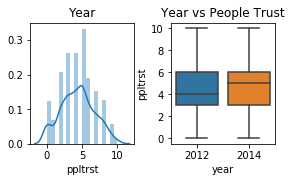

Mean for 2012: 4.402662229617304
Mean for 2014: 4.356435643564357

MannwhitneyuResult(statistic=182068.0, pvalue=0.49770792998106145)


Country: DE


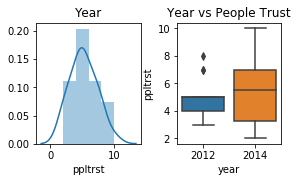

Mean for 2012: 5.076923076923077
Mean for 2014: 5.357142857142857

MannwhitneyuResult(statistic=84.0, pvalue=0.37414178719449009)


Country: ES


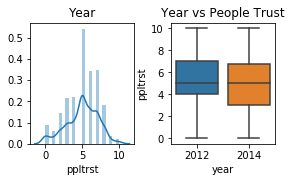

Mean for 2012: 5.127806563039724
Mean for 2014: 4.940035273368607

MannwhitneyuResult(statistic=617480.0, pvalue=0.0061948210527193069)


Country: NO


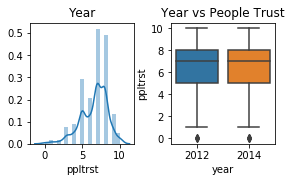

Mean for 2012: 6.648305084745763
Mean for 2014: 6.599719101123595

MannwhitneyuResult(statistic=248611.0, pvalue=0.32466077815437411)


Country: SE


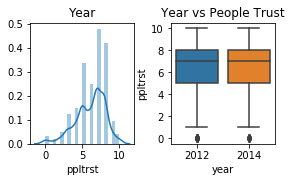

Mean for 2012: 6.043073341094296
Mean for 2014: 6.239907727797001

MannwhitneyuResult(statistic=350787.5, pvalue=0.017080947275388083)


In [278]:
for c in df.cntry.unique():
    print ('\n\nCountry: ' + c)
    dataSet = df[df['cntry'] == c]
    x = {'column':'year', 'label':'Year'}
    y = {'column':'ppltrst', 'label':'People Trust'}
    xVals = [{'label':'2012','value':6},
             {'label':'2014','value':7}]
    compareClass = stats.mannwhitneyu

    plotAndCompare(dataSet,x,y,xVals,compareClass)

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

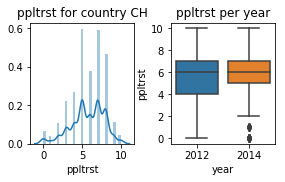

CH 2012 Median: 6.0
CH 2014 Median: 6.0
MannwhitneyuResult(statistic=267361.0, pvalue=0.28548480842716395)


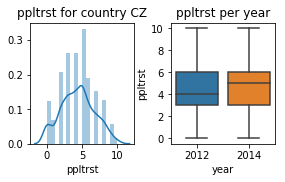

CZ 2012 Median: 4.0
CZ 2014 Median: 5.0
MannwhitneyuResult(statistic=182068.0, pvalue=0.49770792998106145)


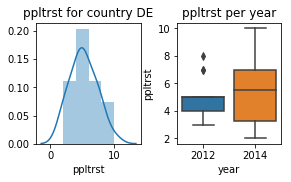

DE 2012 Median: 5.0
DE 2014 Median: 5.5
MannwhitneyuResult(statistic=84.0, pvalue=0.37414178719449009)


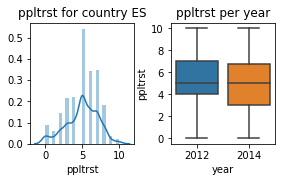

ES 2012 Median: 5.0
ES 2014 Median: 5.0
MannwhitneyuResult(statistic=617480.0, pvalue=0.0061948210527193069)


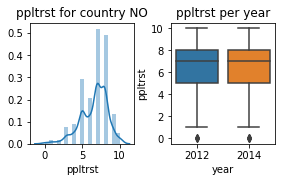

NO 2012 Median: 7.0
NO 2014 Median: 7.0
MannwhitneyuResult(statistic=248611.0, pvalue=0.32466077815437411)


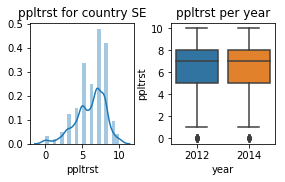

SE 2012 Median: 7.0
SE 2014 Median: 7.0
MannwhitneyuResult(statistic=350787.5, pvalue=0.017080947275388083)


In [201]:
compute('ppltrst')

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

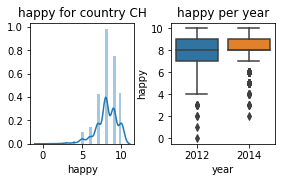

CH 2012 Median: 8.0
CH 2014 Median: 8.0
MannwhitneyuResult(statistic=265131.5, pvalue=0.19495027197081582)


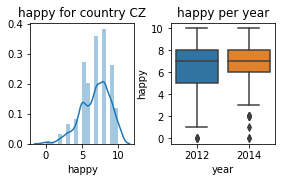

CZ 2012 Median: 7.0
CZ 2014 Median: 7.0
MannwhitneyuResult(statistic=176796.0, pvalue=0.18724347670459124)


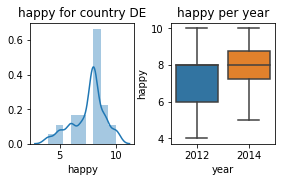

DE 2012 Median: 8.0
DE 2014 Median: 8.0
MannwhitneyuResult(statistic=73.5, pvalue=0.19313536018324134)


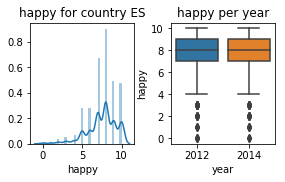

ES 2012 Median: 8.0
ES 2014 Median: 8.0
MannwhitneyuResult(statistic=629830.0, pvalue=0.04263522765394516)


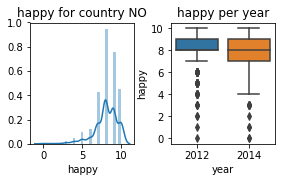

NO 2012 Median: 8.0
NO 2014 Median: 8.0
MannwhitneyuResult(statistic=220453.5, pvalue=1.2346345897635287e-05)


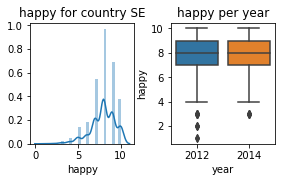

SE 2012 Median: 8.0
SE 2014 Median: 8.0
MannwhitneyuResult(statistic=369192.0, pvalue=0.37586498218551584)


In [142]:
compute('happy')

## Who reported watching more TV in 2012, men or women?

In [153]:
dataSet = df[df['year'] == 6]
x = 'gender'
y = 'tvtot'

In [162]:
g = sns.boxplot(x=x, y=y, data=df).set_title('temp')

ValueError: Could not interpret input 'gender'

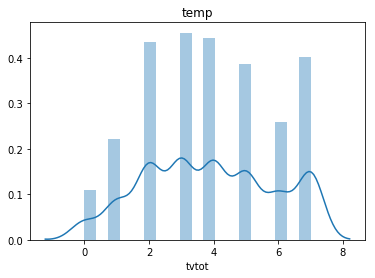

In [160]:
t = sns.distplot(dataSet[y]).set_title('temp')

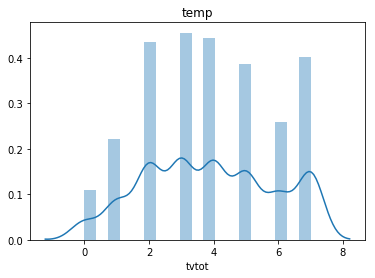

In [157]:
t = sns.distplot(df[df['year'] == 6]['tvtot']).set_title('temp')

In [155]:
df[df['year'] == 6][y]

0       3.0
1       6.0
2       1.0
3       4.0
4       5.0
6       3.0
7       2.0
8       2.0
9       4.0
10      1.0
11      4.0
12      4.0
13      2.0
14      4.0
15      5.0
16      4.0
17      2.0
18      0.0
19      2.0
20      7.0
21      1.0
22      2.0
23      2.0
24      0.0
25      0.0
26      2.0
27      0.0
28      2.0
29      7.0
30      6.0
       ... 
7656    2.0
7657    0.0
7658    3.0
7659    3.0
7660    2.0
7661    3.0
7662    7.0
7663    2.0
7664    7.0
7665    4.0
7666    5.0
7667    4.0
7668    5.0
7669    3.0
7670    2.0
7671    0.0
7672    3.0
7673    1.0
7674    7.0
7675    3.0
7676    1.0
7677    3.0
7678    3.0
7679    5.0
7680    5.0
7681    1.0
7682    3.0
7683    4.0
7684    0.0
7685    7.0
Name: tvtot, Length: 4071, dtype: float64

In [154]:
dataSet.loc[y]

KeyError: 'the label [tvtot] is not in the [index]'

In [151]:

t = sns.distplot(dataSet[y]).set_title('temp')
sns.distplot(dataSet.loc[y]).set_title('temp')

KeyError: 'the label [tvtot] is not in the [index]'

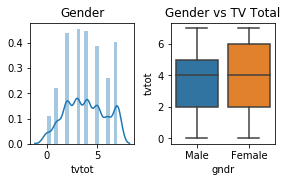

In [221]:
dataSet = df[df['year'] == 6]
x = {'column':'gndr', 'label':'Gender'}
y = {'column':'tvtot', 'label':'TV Total'}
xVals = [{'label':'Male','value':1},
         {'label':'Female','value':2}]
compareClass = g.axes.set_xticklabels

# for each item in the xvals
# grab the data for compare
# grab the labels
# 

size = (4,2)
plt.figure()
plt.subplots(figsize = size)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.subplot(1,2,1)
sns.distplot(dataSet[y['column']]).set_title(x['label'])
plt.subplot(1,2,2)
g = sns.boxplot(x=x['column'], y=y['column'], data=dataSet).set_title(x['label']+' vs '+ y['label'])
labels=[xVals[0]['label'],xVals[1]['label']]
g.axes.set_xticklabels(labels)
plt.show()
compareClass(dataSet[],dataSet[])

In [215]:
labels=[xVals[0]['label'],xVals[1]['label']]

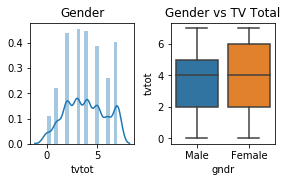

MannwhitneyuResult(statistic=2042391.5, pvalue=0.21654019333228419)


In [265]:

dataSet = df[df['year'] == 6]
x = {'column':'gndr', 'label':'Gender'}
y = {'column':'tvtot', 'label':'TV Total'}
xVals = [{'label':'Male','value':1},
         {'label':'Female','value':2}]
compareClass = stats.mannwhitneyu

plotAndCompare(dataSet,x,y,xVals,compareClass)

In [211]:
xVals[1]['label']

'Female'

In [188]:
dataSet = df[df['year'] == 6]
x = {'column':'gndr', 'label':'Gender'}
y = {'column':'tvtot', 'label':'Television Total'}
xVals = {1: {'label': 'Male', 'value':1},
         2: {'label':'Female', 'value':2}}

In [189]:
x['column']

'gndr'

In [181]:
xVals.values()

dict_values([1, 2])

In [169]:
x = ({'column':'gndr', 'label':'Gender'})
x['label']

'Gender'

In [ ]:



size = (4,2)
plt.figure()
plt.subplots(figsize = size)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
plt.subplot(1,2,1)
sns.distplot(df.loc[df['cntry'] == c][variable]).set_title(variable + ' for country ' + c)
plt.subplot(1,2,2)
g = sns.boxplot(x='year', y=variable, data=df.loc[df['cntry'] == c]).set_title(variable + ' per year')
g.axes.set_xticklabels([2012, 2014])
plt.show()
var12 = df[(df['cntry'] == c) & (df['year'] == 6)][variable]
print(c + ' 2012 Median: ' + str(var12.median()))
var14 = df[(df['cntry'] == c) & (df['year'] == 7)][variable]
print(c + ' 2014 Median: ' + str(var14.median()))
print (stats.mannwhitneyu(var12, var14))

In [149]:
df[df['year'] == 6]['tvtot']

0       3.0
1       6.0
2       1.0
3       4.0
4       5.0
6       3.0
7       2.0
8       2.0
9       4.0
10      1.0
11      4.0
12      4.0
13      2.0
14      4.0
15      5.0
16      4.0
17      2.0
18      0.0
19      2.0
20      7.0
21      1.0
22      2.0
23      2.0
24      0.0
25      0.0
26      2.0
27      0.0
28      2.0
29      7.0
30      6.0
       ... 
7656    2.0
7657    0.0
7658    3.0
7659    3.0
7660    2.0
7661    3.0
7662    7.0
7663    2.0
7664    7.0
7665    4.0
7666    5.0
7667    4.0
7668    5.0
7669    3.0
7670    2.0
7671    0.0
7672    3.0
7673    1.0
7674    7.0
7675    3.0
7676    1.0
7677    3.0
7678    3.0
7679    5.0
7680    5.0
7681    1.0
7682    3.0
7683    4.0
7684    0.0
7685    7.0
Name: tvtot, Length: 4071, dtype: float64